In [1]:
cd thumb

/Users/bussonniermatthias/dev/orly-full-res/thumb


let's see all the images in this repository:

In [2]:
names=!ls *.png
names[:30]

['10x-big.png',
 'adulting-big.png',
 'arbitraryforecasts-big.png',
 'avoiddarkpatterns-big.png',
 'blamingthearchitecture-big.png',
 'blamingtheuser-big.png',
 'breakingthebackbutton-big.png',
 'buzzwordfirst-big.png',
 'buzzwordfirstdesign-big.png',
 'casualsexism-big.png',
 'catchingemall-big.png',
 'changinstuff-big.png',
 'chasingdesignfads-big.png',
 'choosingbasedongithubstars-big.png',
 'codingontheweekend-big.png',
 'coffeeintocode-big.png',
 'copyingandpasting-big.png',
 'crushingit-big.png',
 'deletingcode-big.png',
 'doingwhateverdanabramovsays-big.png',
 'droptableanimals-big.png',
 'endlessboilerplate-big.png',
 'essentialfizzbuzz.png',
 'exitingvim-big.png',
 'expertexcusesfornotwritingunittests-big.png',
 'expertexcusestomissmeetings.png',
 'fiddlingwiththepadding-big.png',
 'fittingactualuserdata-big.png',
 'focusingontrivialdetails.png',
 'fomo-big.png']

That's cute, but, for images, not really usefull. We know we can display images in the Jupyter notebook when using the IPython kernel:

In [7]:
from IPython.display import Image

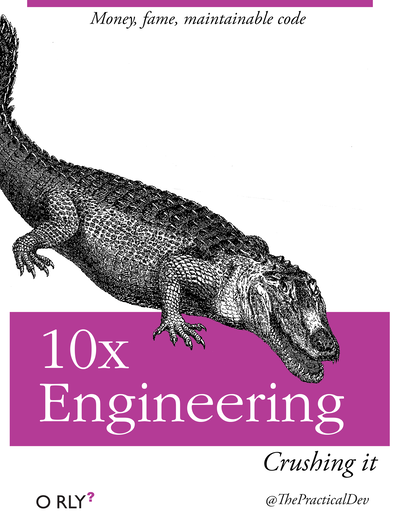

In [8]:
im = Image(names[0])
im

What if we map `Images` to each element of list (actually let's just use a subset) 

In [37]:
from random import choices
mylist = list(map(Image, set(choices(names, k=20))))

:-( Let's build an HTML image grid ourselves, here is how to display a single image:

In [38]:
data = im.data

In [39]:
import base64
from IPython.display import HTML
def tag_from_data(data, size='100%'):
    return ('''<img class="jc" style="display:inline; width:{1}; max-width:400px; padding:10px; margin-top:14px" '''+\
           '''src="data:image/png;base64,{0}" />''').format(''.join(base64.encodebytes(data).decode().split('\n')), size)


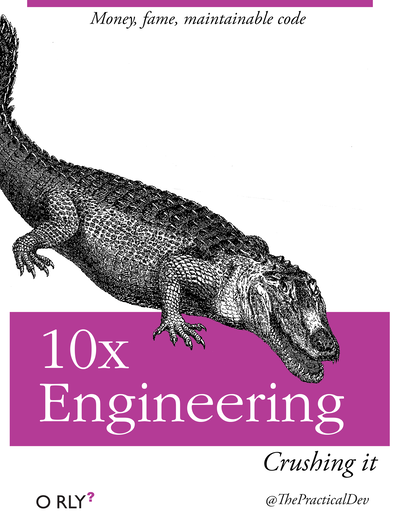

In [40]:
HTML(tag_from_data(data))

We now want to subclass list, and define a `_repr_html_`:

In [41]:
class VignetteList:
    
    
    def __init__(self, *images, size=None):
        self.images = images
        self.size = size
        
    def _repr_html_(self):
        return '<p>'+','.join(tag_from_data(im.data, self.size)  for im in self.images)+'</p>'
        


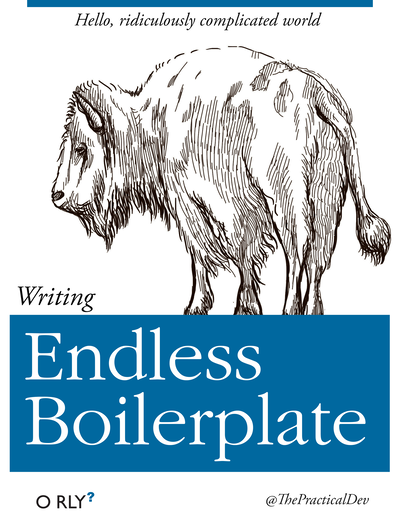
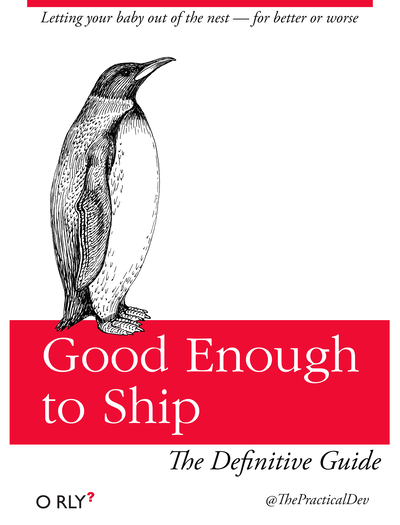
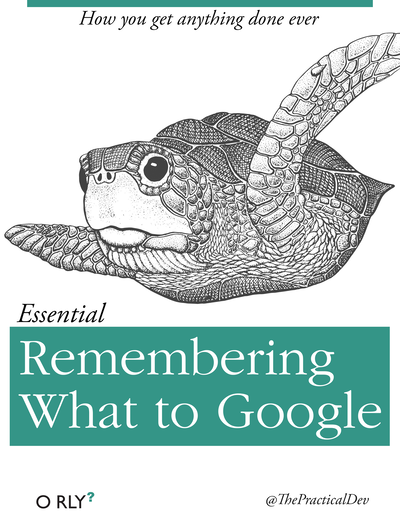
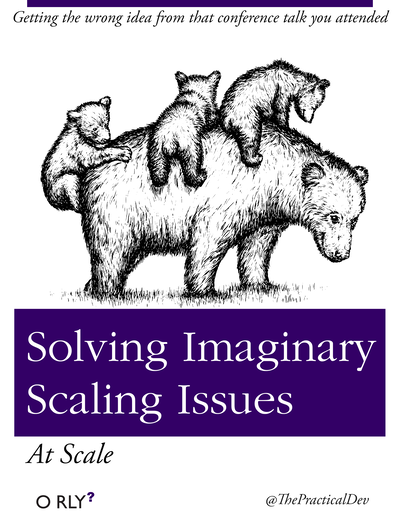
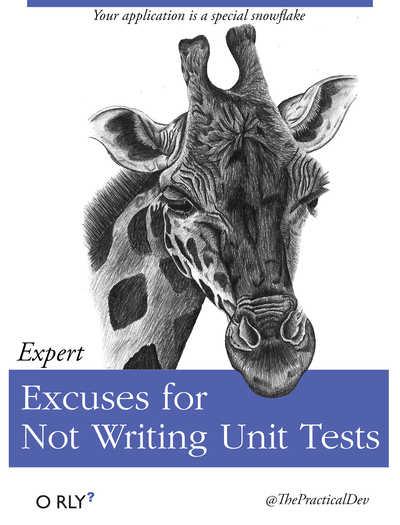
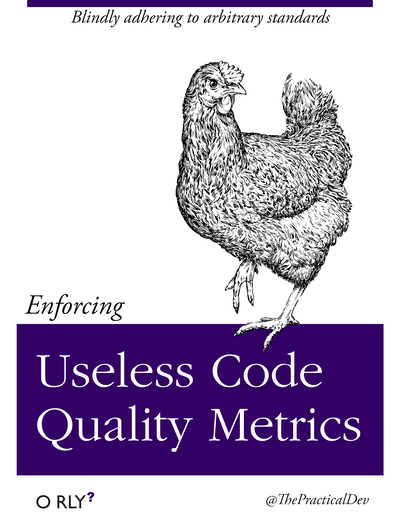
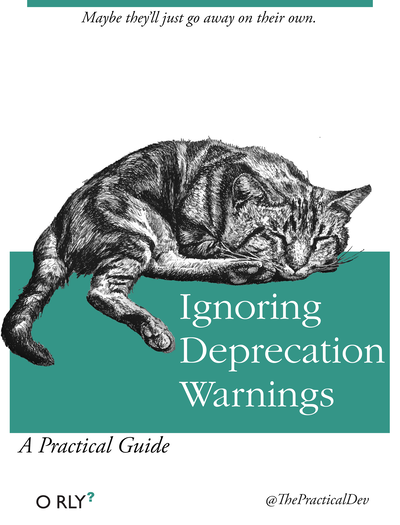
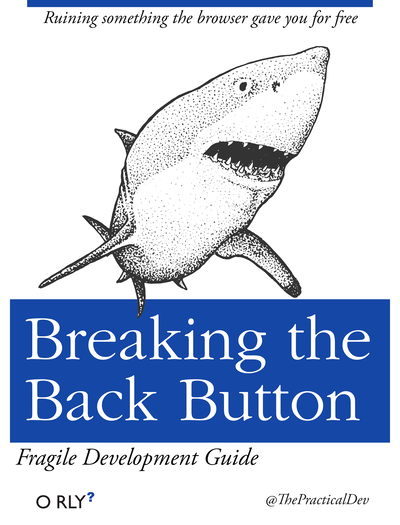
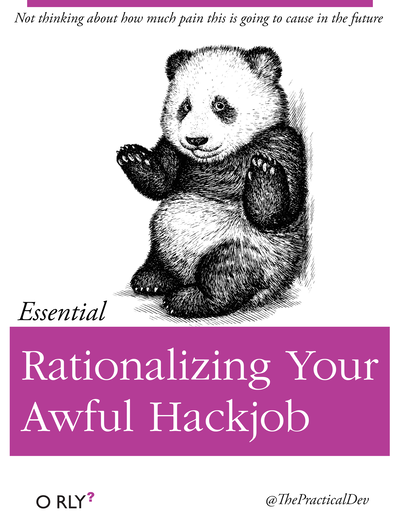
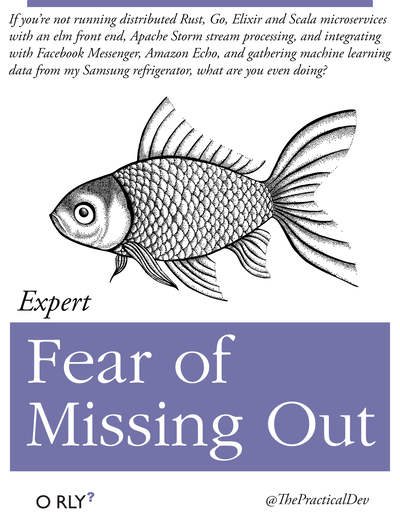
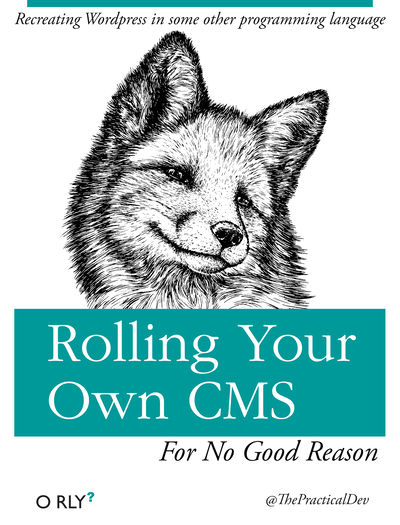
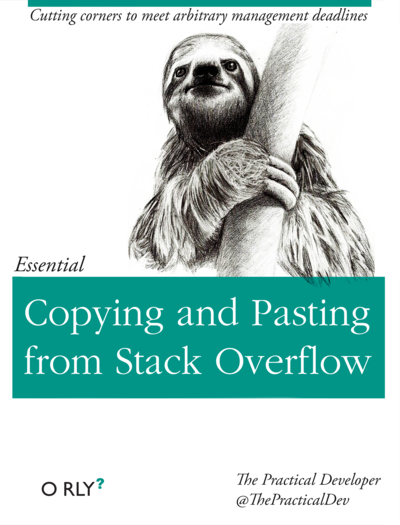
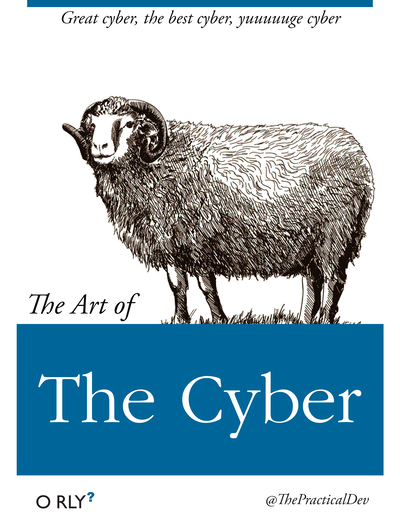
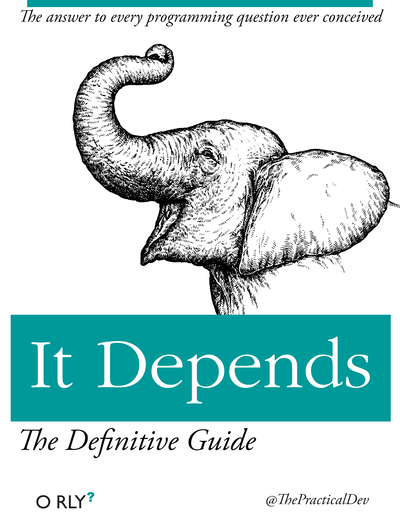
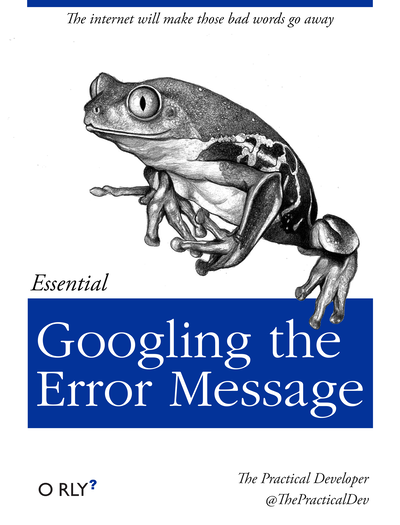
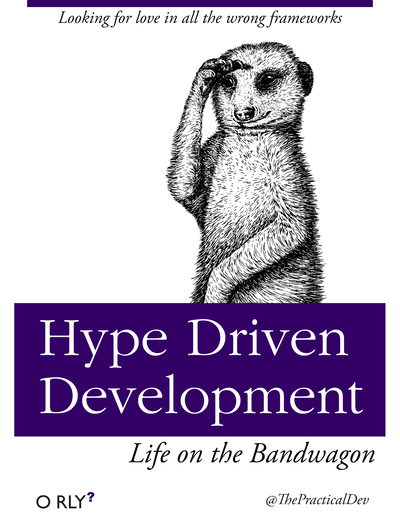
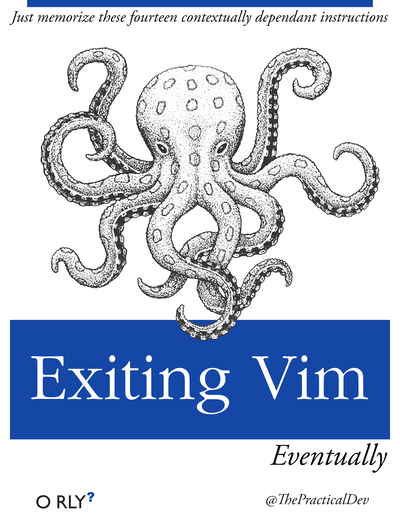
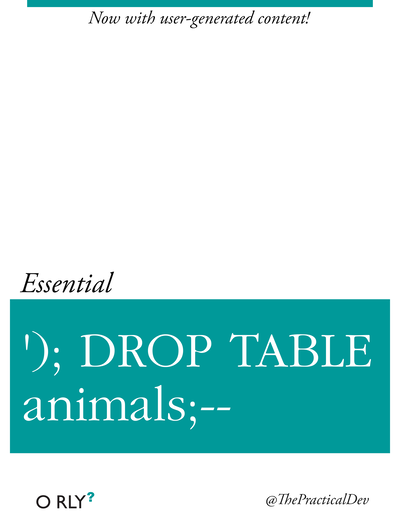
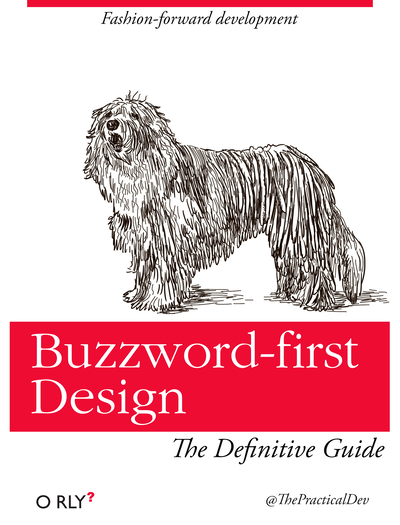

In [42]:
VignetteList(*mylist, size='200px')

In [44]:
def tag_from_data_II(data, size='100%'):
    return ('''<img class="jc" style="display:inline; width:{1}; max-width:400px; padding:10px; margin-top:14px" '''+\
           '''onMouseOver="this.style['box-shadow']='5px 5px 30px 0px rgba(163,163,163,1)'" '''+\
           '''onMouseOut="this.style['box-shadow']=''"  '''+\
           '''src="data:image/png;base64,{0}" />''').format(''.join(base64.encodebytes(data).decode().split('\n')), size)

def html_list_formatter(ll):
    if not all(isinstance(x, Image) for x in ll):
        return None
    return '['+','.join(tag_from_data_II(im.data, '200px')  for im in ll)+']'

ipython = get_ipython()
html = ipython.display_formatter.formatters['text/html']
html.for_type(list, html_list_formatter)

[<IPython.core.display.Image object>,
 <IPython.core.display.Image object>,
 <IPython.core.display.Image object>,
 <IPython.core.display.Image object>,
 <IPython.core.display.Image object>,
 <IPython.core.display.Image object>,
 <IPython.core.display.Image object>,
 <IPython.core.display.Image object>,
 <IPython.core.display.Image object>,
 <IPython.core.display.Image object>,
 <IPython.core.display.Image object>,
 <IPython.core.display.Image object>,
 <IPython.core.display.Image object>,
 <IPython.core.display.Image object>,
 <IPython.core.display.Image object>,
 <IPython.core.display.Image object>,
 <IPython.core.display.Image object>,
 <IPython.core.display.Image object>,
 <IPython.core.display.Image object>]
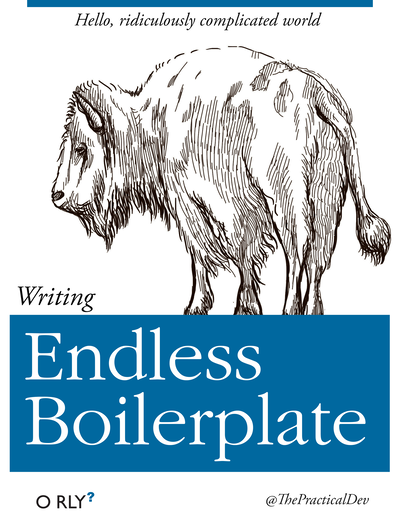
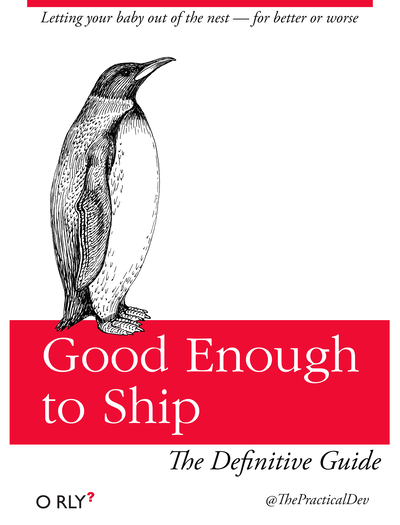
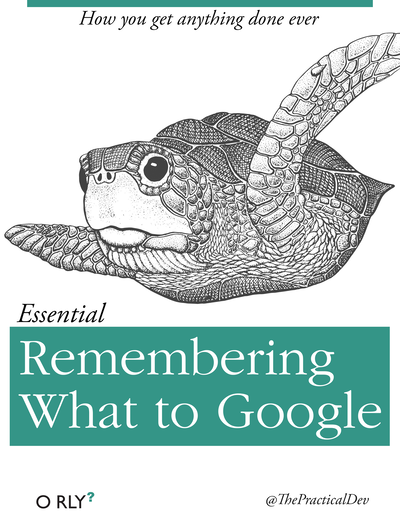
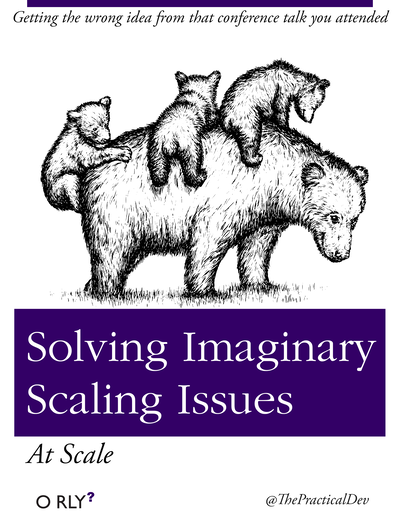
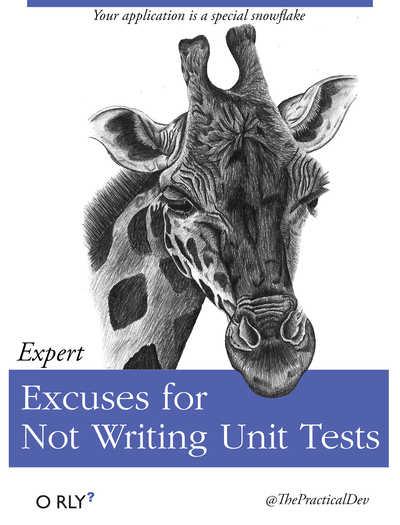
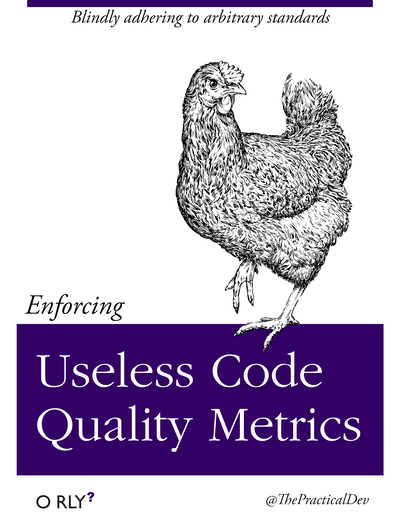
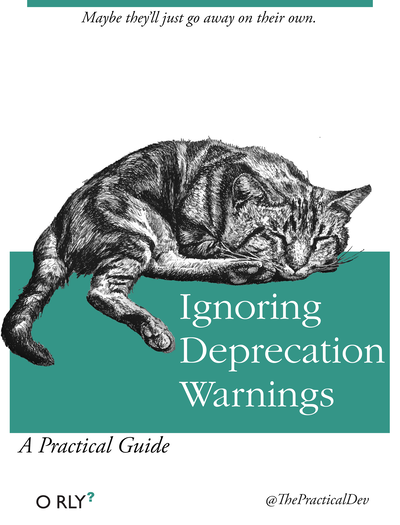
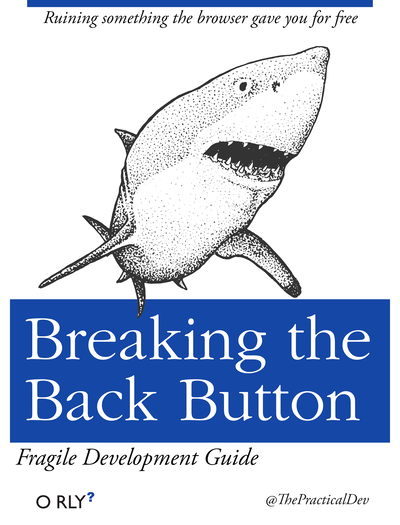
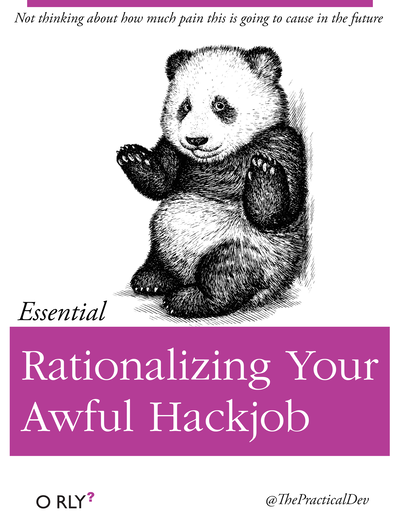
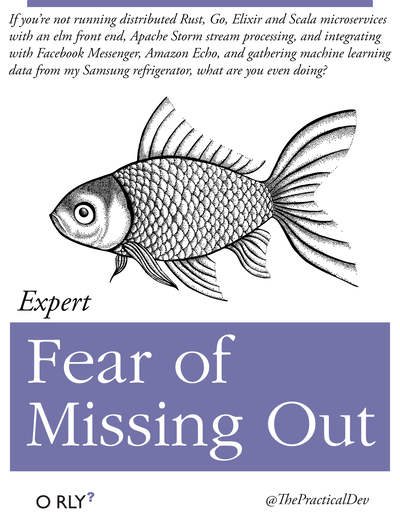
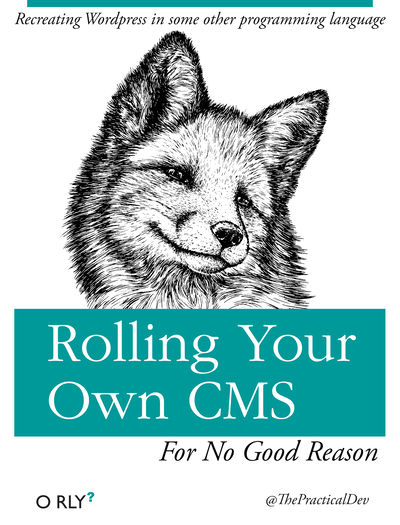
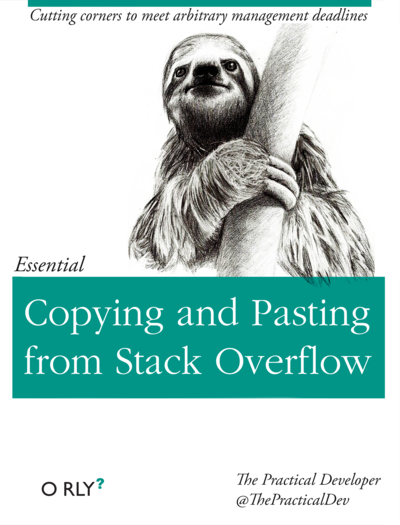
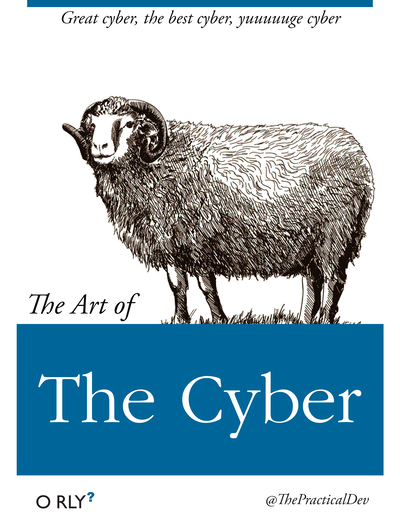
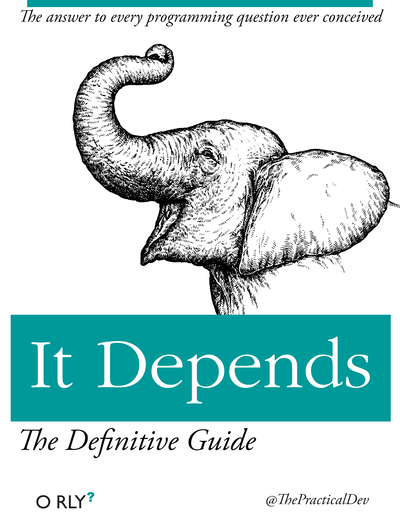
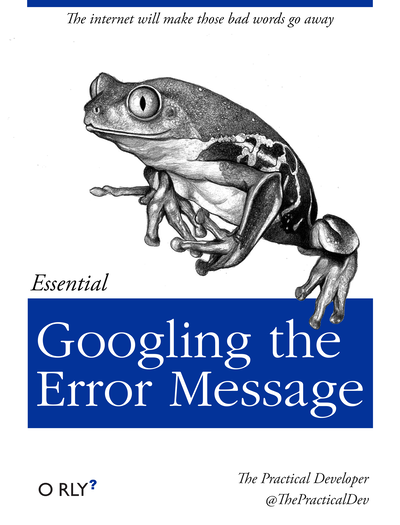
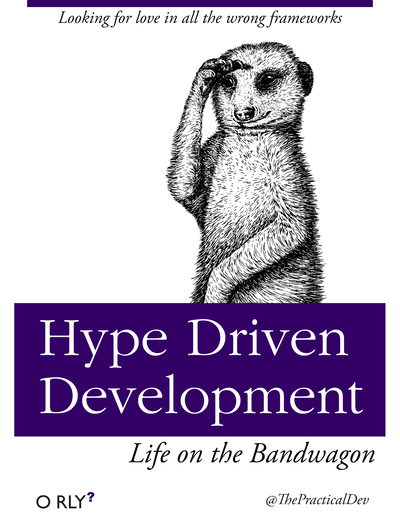
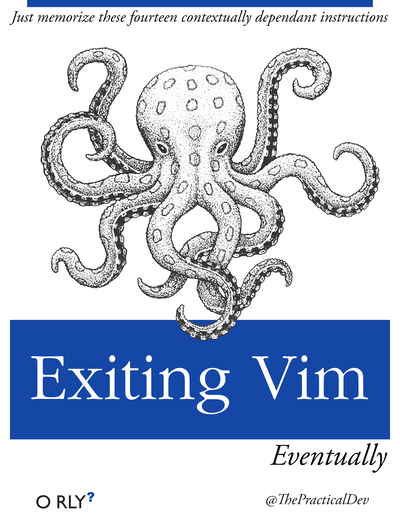
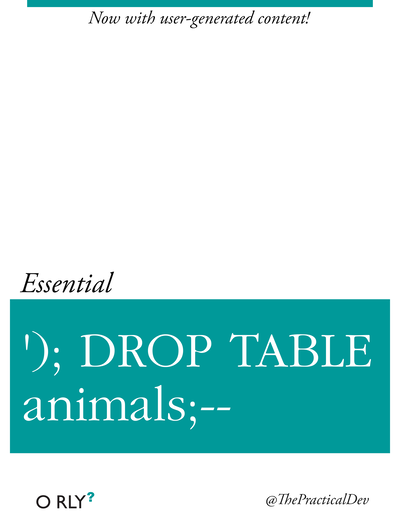
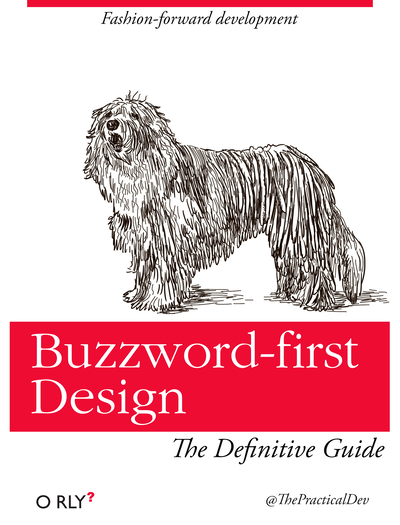

In [45]:
mylist